# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

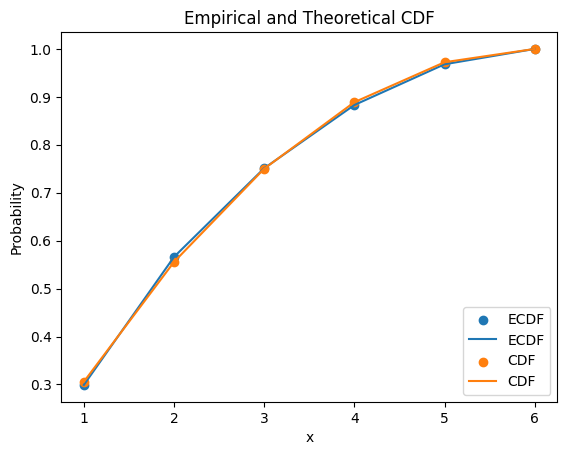

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1.
faces = np.array([1,2,3,4,5,6]) 

# Explicit calculation:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i],faces[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

# Bootstrap simulation:
N = 1000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= faces[i] )

# Comparison:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()


Expected value:  3.4874


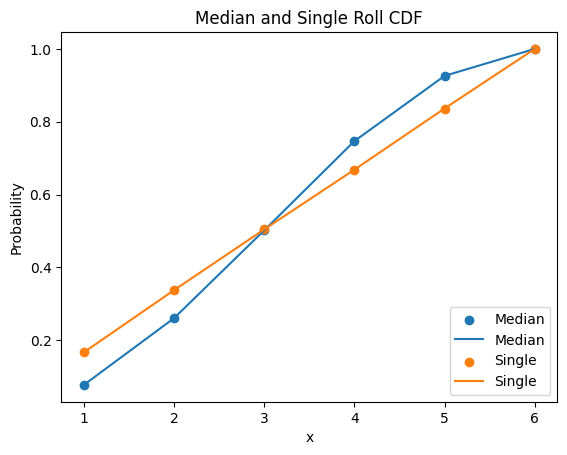

In [2]:
## 2.
faces = np.array([1,2,3,4,5,6]) 
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
med_roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i] )
    single[i] = (1/N)*np.sum( d1 <= faces[i] )

expected_value = np.sum(med_roll)/N

# # Comparison:
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()


                  0
count  50000.000000
mean       4.170240
std        3.210431
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       34.000000


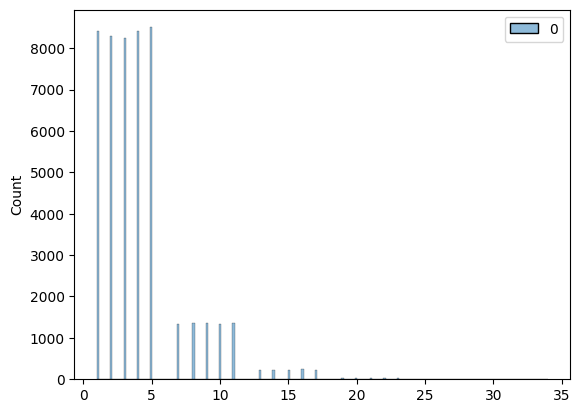

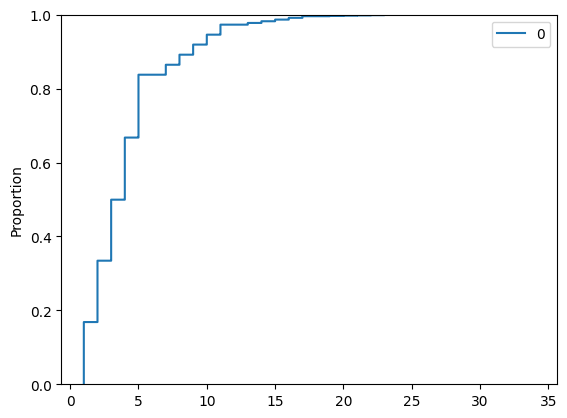

In [3]:
## 3. 

N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)

print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 

Raw treatment effect:  0.00011505110015985753
       treatment breast_cancer_death  survive
39313  mammogram                  no        1
30320  mammogram                  no        1
1431   mammogram                  no        1
37529  mammogram                  no        1
43699  mammogram                  no        1
...          ...                 ...      ...
9288   mammogram                  no        1
2372   mammogram                  no        1
28677  mammogram                  no        1
10729  mammogram                  no        1
13512  mammogram                  no        1

[44925 rows x 3 col

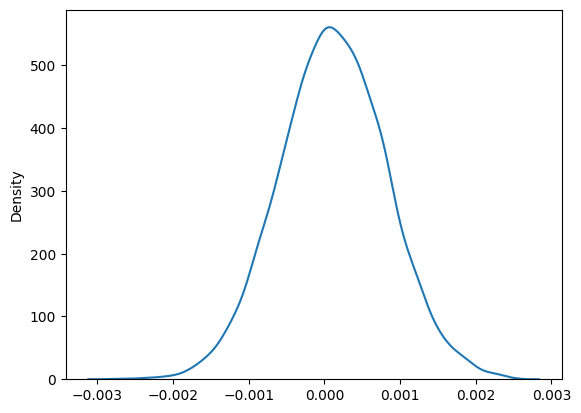

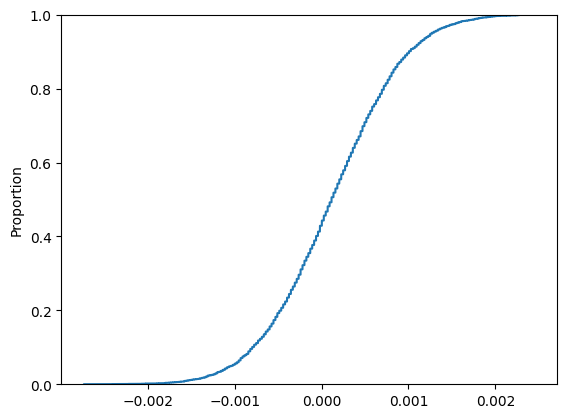

99% confidence interval: ( -0.0017104963033095838 ,  0.0019627987936547916 )


In [10]:
df = pd.read_csv('./data/mammogram.csv')

## 1. 

print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

## 2. 

df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)
    print(df_treat_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

## 3. 
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )


> So the 99% confidence interval includes zero, suggesting that getting a mammogram does not result in a statistically signficant different in 25-year survival rates. Of course, we are just playing with data: I am not seriously suggesting that mammograms shouldn't be subsidized or used as a regular diagnostic procedure. If we did take these results seriously, we might want to ask some follow-up questions: Were the mammograms randomly assigned or not? If there's selection into getting a mammogram by people who are wealthier and have better health overall, the prevalence of breast cancer might be lower in the treatment group than the control group, making it appear that mammograms aren't useful. Likewise, are there other significant risk factors that cause breast cancer? It might be true that mammograms appear ineffective in reducing breast cancer mortality rates at the population level, but for some sub-populations or high-risk groups, it might be a very effective intervention. Finally, this only considers mortality: It might be the case that other measures of quality of life are significantly improved by catching breast cancer earlier. For example, the survival rate might be similar between the two groups, but the treatment group underwent chemotherapy much less often. There are just the issues I can think of, and I am sure an oncologist could bring up many others. Nevertheless, this is the kind of analysis we do to try to understand whether treatments work or not: What's the distribution of the treatment effect, and is zero a plausible value?

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [5]:
df.head()

,treatment,breast_cancer_death,survive
0,mammogram,yes,0
1,mammogram,yes,0
2,mammogram,yes,0
3,mammogram,yes,0
4,mammogram,yes,0


outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



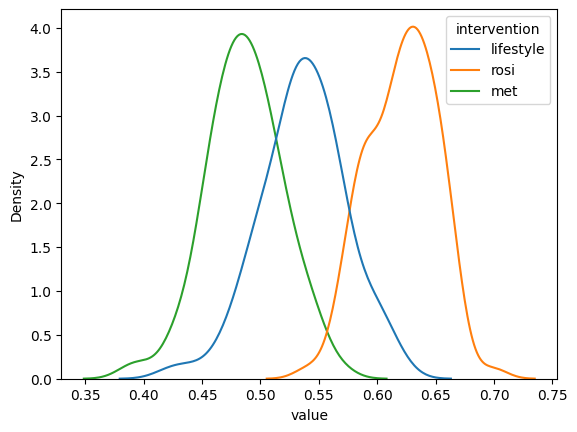

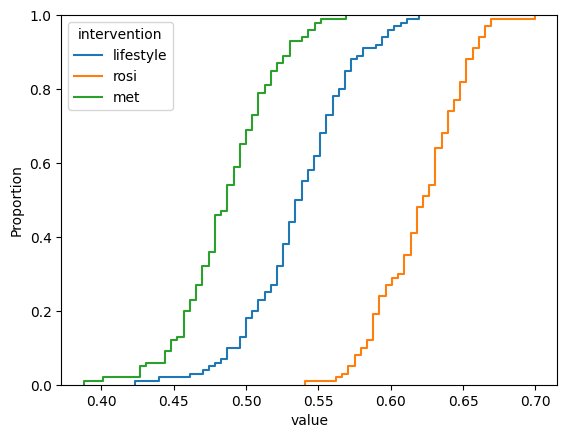

In [19]:
df = pd.read_csv('./data/diabetes_hw.csv')
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1

## 1. 
print(pd.crosstab(df['treatment'], df['outcome']), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

## 2.
print('lifestyle success rate: ', 125/(125+109), '\n')  
print('met success rate: ', 112/(112+120), '\n')
print('rosi success rate: ', 143/(143+90), '\n')

## 3. 
df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    #
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    #
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)    

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'}) 
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()


> Rosi appears to be the most effective, followed by lifestyle, followed by metformin.

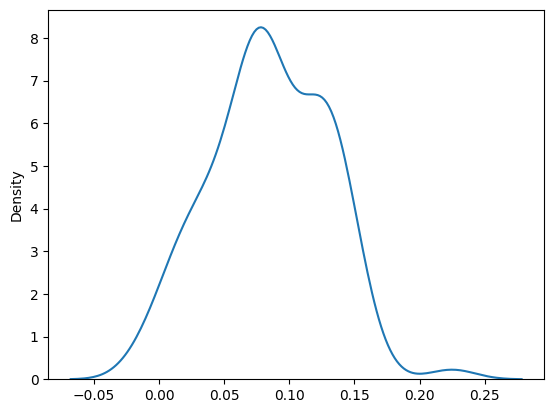

90% Confidence interval, rosi minus lifestyle:  0.010660834158688277 ,  0.14805399655185064


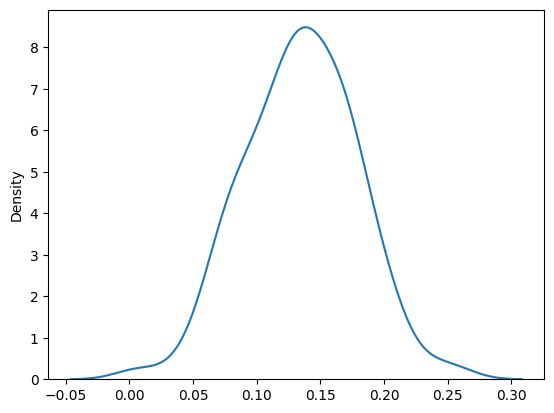

90% Confidence interval, rosi minus metformin:  0.06627201420748853 ,  0.2040189803167086


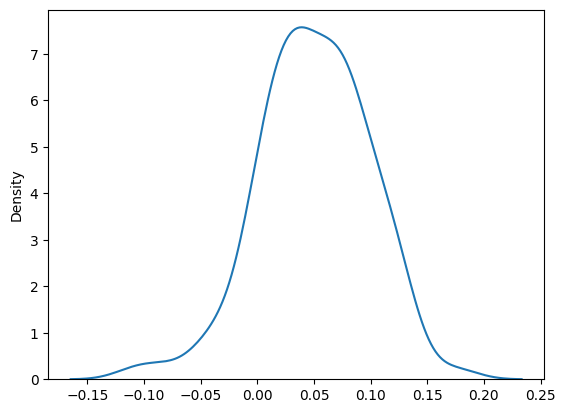

90% Confidence interval, lifestyle minus metformin:  -0.026845711759504922 ,  0.1206988653109343


In [22]:
## 4. 

rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))


> Rosi appears better than Lifestyle, since the 90% confidence interval doesn't include zero. We're 90% confidence that the difference in effect sizes is between .006 and .16. Rosi appears better than Metform, since the 90% confidence interval doesn't include zero. We're 90% confident that the difference in effect sizes is between .057 and .187. There isn't a statistically significant difference between Lifestyle and Metformin, since 0 is in the 90% confidence interval. We're 90% confident that the difference in effect sizes is between -.03 and .125.  

> 5. Here is a sincere answer: "It depends. If Lifestyle succeeds, it's probably safer and more effective than using drugs to control diabetes: There can be long-term effects not covered by this study, including damage to other organs or long-run resistance to the drug. If it's possible for a person to change their diet and lifestyle to reverse their need for insulin injections, they might avoid other liver and kidney problems later in life, including dialysis. Leading a healthy and sustainable life, when possible, is better than relying on drugs to reverse some symptoms but not treat the underlying biological and behavioral issues. If lifestyle interventions fail or are unlikely to succeed for medical reasons, then Rosi seems to clearly dominate Met, and can reduce insulin resistance." Notice that what I did not write is: "The bootstrapped numbers suggest Rosi dominates Lifestyle and Met." The first answer is nuanced and considers all the available options for a patient and potential unintended consequences. The second answer focuses merely on comparing distributions. We have an obligation to honestly and competently deal with the world in all of its complexity as much as we can, especially when it impacts the well-being and health of other people.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

In [8]:
df = pd.read_csv('./data/heart_hw.csv')
df.tail()

,Unnamed: 0,age,transplant,y
98,99,30,control,1
99,100,48,treatment,1
100,101,40,treatment,1
101,102,48,treatment,1
102,103,33,treatment,1


In [9]:
## 1. 

df['treat'] = 0
df['intercept'] = 1
df.loc[ df['transplant']=='treatment','treat']=1

print( pd.crosstab( df['transplant'], df['y']), '\n')

# a. 
print('Proportion survived, control: ', 4/34, '\n')
print('Average treatment effect: ', 24/(24+45)-4/(30+4))

y            0   1
transplant        
control     30   4
treatment   45  24 

Proportion survived, control:  0.11764705882352941 

Average treatment effect:  0.23017902813299232


In [10]:
## 2. 

from sklearn.linear_model import LinearRegression

y = df['y']
X = df.loc[:,['intercept', 'treat'] ]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)


Regression Coefficients:  [0.11764706 0.23017903]


> The constant of the regression corresponds to the average outcome in the control group. The slope in the regression corresponds to the average treatment effect. So you can use regressions to analyze interventions and bootstrap the regression coefficients.

In [11]:
## 3. 

from sklearn.linear_model import LinearRegression

y = df['y']
X = df.loc[:,['intercept', 'treat', 'age'] ]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)


Regression Coefficients:  [ 0.70195697  0.26470169 -0.01360722]


> Since we're controlling for age, we address some ommitted variables bias: Older people are probably less likely to survive organ transplantation, all else equal; older people are also probably more likely to require an organ transplant, so the covariance between treatment and the omitted variable is positive. This means the OVB related to age will be negative and depress the coefficient on the treatment effect, and that's what we see: When we control for age, the treatment effect goes up and the slope on age is negative.

<Axes: xlabel='age'>

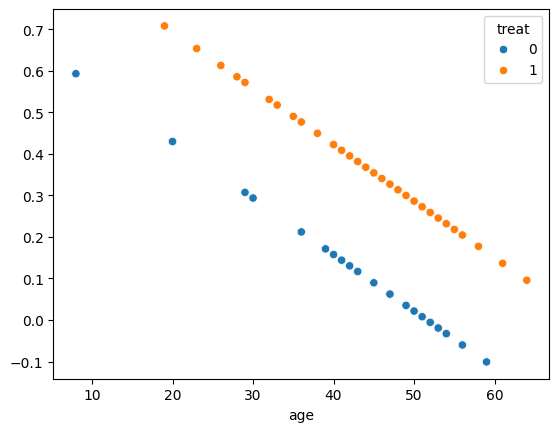

In [12]:
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

> 4. I included age, age-squared, and age-cubed to control for age effects, alongside a treatment dummy, as well as an interaction between age and treatment.

Regression Coefficients:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -7.70114914e-03
 -2.70227509e-03  2.01932637e-05]


<Axes: xlabel='age'>

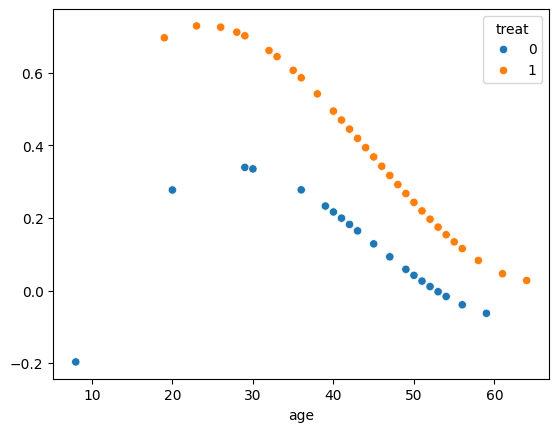

In [13]:
from sklearn.linear_model import LinearRegression
df['treatXage'] = df['treat']*df['age']
df['age_sq'] = df['age']**2
df['treatXage_sq'] = df['treat']*df['age_sq']
df['age_cu'] = df['age']**3
df['treatXage_cu'] = df['treat']*df['age_cu']

y = df['y']
X = df.loc[:,['intercept', 'treat', 'age', 
              'treatXage',  
              'age_sq', 'age_cu'] ]
reg = LinearRegression(fit_intercept=False).fit(X,y)
print('Regression Coefficients: ', reg.coef_)
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

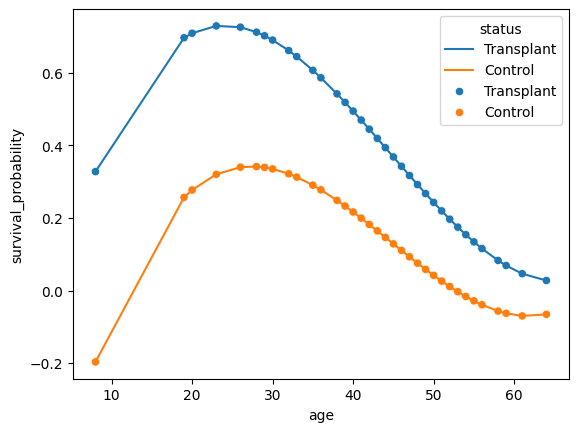

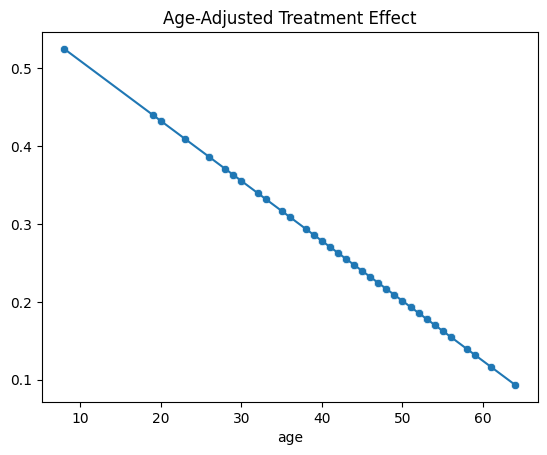

In [14]:
X_all_transplant = X
X_all_transplant['treat'] = 1
X_all_transplant['treatXage'] = X['age']
y_hat_transplant = reg.predict(X_all_transplant)

X_no_transplant = X
X_no_transplant['treat'] = 0
X_no_transplant['treatXage'] = 0
y_hat_control = reg.predict(X_no_transplant)

gdf_treat = pd.DataFrame({'survival_probability':y_hat_transplant, 'age':X['age'], 'status':'Transplant'})
gdf_control = pd.DataFrame({'survival_probability':y_hat_control, 'age':X['age'], 'status':'Control'})
gdf = pd.concat([gdf_treat,gdf_control],axis=0)

sns.lineplot(data=gdf,x='age',y='survival_probability',hue = 'status')
sns.scatterplot(data=gdf,x='age',y='survival_probability',hue = 'status')
plt.show()

age_adjusted_treatment_effect = y_hat_transplant - y_hat_control
sns.lineplot(x=X['age'],y=age_adjusted_treatment_effect).set_title('Age-Adjusted Treatment Effect')
sns.scatterplot(x=X['age'],y=age_adjusted_treatment_effect)
plt.show()


> It appears that your probability of survival peaks around 20 years old, and then declines as you age. By 40, you only have a 50-50 chance of survival with a heart transplant, down from a peak near 70% in your mid-twenties. By 50 or 60, the odds of survival are very low. Very young people also seem less likely to survive than people in their 20s. Enjoy your 20s!

> 5. I would be largely against using algorithms in the manner suggested. It's one thing to use predictive algorithms and data to explore what's possible, but algorithms cannot take responsibility for decision-making. In situations with scarcity like this, merely maximizing the number of life-years would correspond to giving hearts to people in their twenties, and then working down the curve on either side until the organs run out. That ignores any context to these cases. A world run by algorithms that maximize measures of raw efficiency would be a kafka-esque dystopia, not an efficient and functional society.